### Библиотеки / данные

импортируем библиотеки numpy и pandas

In [1]:
import numpy as np
import pandas as pd

импортируем библиотеку matplotlib для построения графиков

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

задаем некоторые настройки pandas, регулирующие формат вывода

In [3]:
pd.options.display.max_rows = 10

- считываем данные 
- используем столбец Symbol в качестве индекса 
- считываем только те столбцы ['Symbol', 'Sector', 'Price', 'Book Value', 'Market Cap', 'Dividend Yield']

| Column Name        | Description
| ------------- |:-------------:|
|Symbol|Сокращенное название организации|
|Name|Полное название организации|
|Sector|Сектор экономики|
|Price|Стоимость акции|
|Dividend Yield|Дивидендная доходность|
|Price/Earnings|Цена / прибыль|
|Earnings/Share|Прибыль на акцию|
|Book Value|Балансовая стоимость компании|
|52 week low|52-недельный минимум|
|52 week high|52-недельный максимум|
|Market Cap|Рыночная капитализация|
|EBITDA|**E**arnings **b**efore **i**nterest, **t**axes, **d**epreciation and **a**mortization|
|Price/Sales|Цена / объём продаж|
|Price/Book|Цена / балансовая стоимость|
|SEC Filings|Ссылка *sec.gov*|

In [4]:
sp500 = pd.read_csv("../data/sp500.csv",
                    index_col='Symbol',
                    usecols=['Symbol', 'Sector', 'Price',
                             'Book Value', 'Market Cap',
                             'Dividend Yield'])
sp500

,Sector,Price,Dividend Yield,Book Value,Market Cap
Symbol,,,,,
MMM,Industrials,141.14,2.12,26.668,92.345
ABT,Health Care,39.60,1.82,15.573,59.477
ABBV,Health Care,53.95,3.02,2.954,85.784
ACN,Information Technology,79.79,2.34,8.326,50.513
ACE,Financials,102.91,2.21,86.897,34.753
...,...,...,...,...,...
YHOO,Information Technology,35.02,NaN,12.768,35.258
YUM,Consumer Discretionary,74.77,1.93,5.147,33.002
ZMH,Health Care,101.84,0.81,37.181,17.091


считываем исторические данные о котировках акций

In [5]:
omh = pd.read_csv('../data/omh.csv', 
                  parse_dates=['Date'])

omh.set_index('Date', 
              inplace=True)

In [6]:
omh.head()

,MSFT,AAPL
Date,,
2014-12-01,48.62,115.07
2014-12-02,48.46,114.63
2014-12-03,48.08,115.93
2014-12-04,48.84,115.49
2014-12-05,48.42,115.00


### Настройка 

#### пример 

график цены акции Microsoft

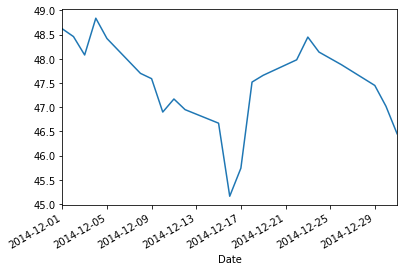

In [7]:
omh.MSFT.plot()

цена акций microsoft и apple на одном графике

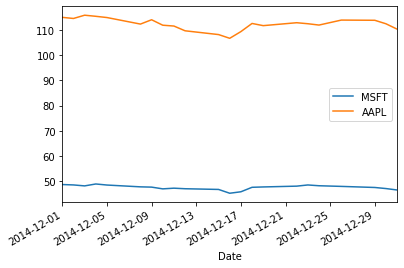

In [8]:
omh.plot()

нормализация:

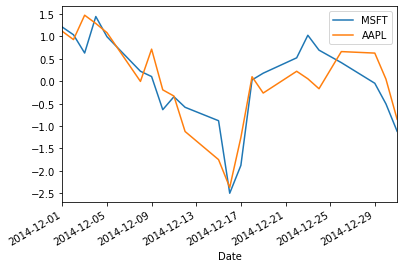

In [9]:
omh_copy =  (omh - omh.mean())/omh.std()
omh_copy.plot()

#### размер 

увеличиваем размер графика

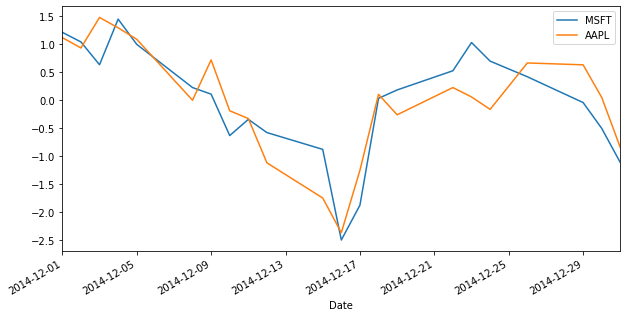

In [10]:
omh_copy.plot(figsize=(10, 5))

#### заголовок / подписи

- заголовок задаем с помощью параметра title метода .plot()
- после вызова метода .plot() явно задаем подписи осей x и y

Text(0, 0.5, 'Цена')

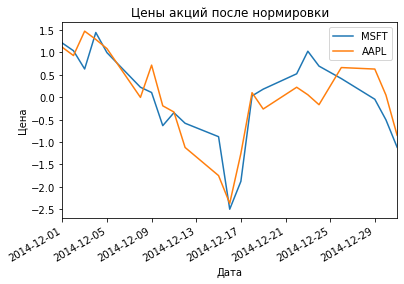

In [11]:
omh_copy.plot(title='Цены акций после нормировки')
plt.xlabel('Дата')
plt.ylabel('Цена')

#### легенда

изменяем элементы легенды, соответствующие именам столбцов датафрейма

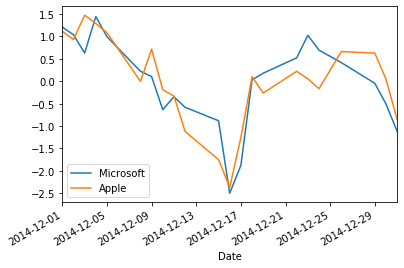

In [12]:
ax = omh_copy.plot()
ax.legend(['Microsoft', 'Apple'])

изменяем расположение легенды

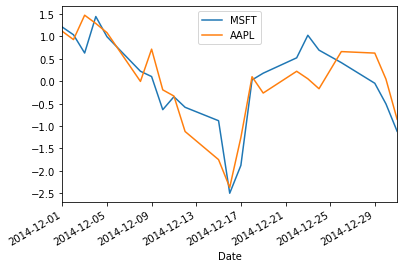

In [13]:
ax = omh_copy.plot()
ax.legend(loc='upper center')

отключаем легенду с помощью legend=False

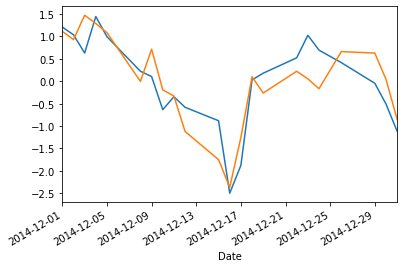

In [14]:
omh_copy.plot(legend=False)

#### цвет / стиль / толщина / маркер

меняем цвета линий графика  
[односимвольные коды](https://matplotlib.org/2.0.2/api/colors_api.html)  
[шестнадцатеричный RGB-код](https://www.rapidtables.com/web/color/RGB_Color.html)

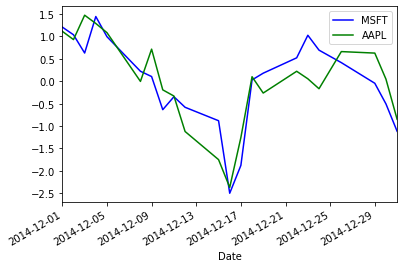

In [15]:
omh_copy.plot(style={'MSFT': '#0000FF', 'AAPL': 'g'}) 

- [различные стили линий](https://matplotlib.org/1.5.3/api/pyplot_api.html#matplotlib.pyplot.plot)  
- увеличиваем толщину линий

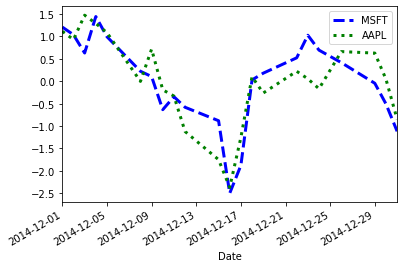

In [16]:
omh_copy.plot(style={'MSFT': 'b--', 'AAPL': 'g:'}, lw=3)

рисуем заново, добавив [маркеры](https://matplotlib.org/api/markers_api.html) линий

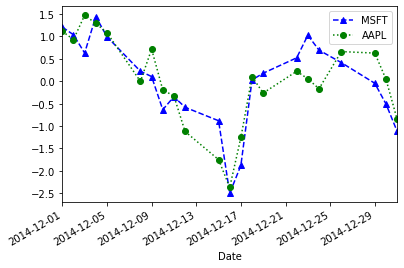

In [17]:
omh_copy.plot(style={'MSFT': 'b--^', 'AAPL': 'g:o'})

### Графики

#### bar

строим столбчатую диаграмму

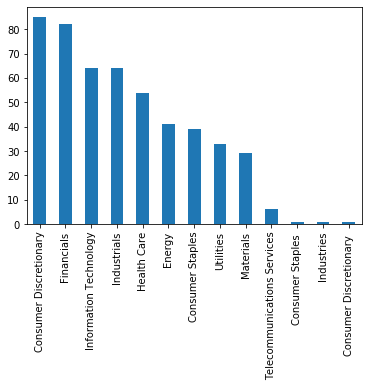

In [18]:
s = sp500.Sector.value_counts()
s.plot(kind='bar')

малочисленные сектора:

In [19]:
small_sectors = s[-4:].index.values
small_sectors

array(['Telecommunications Services', 'Consumer Staples ', 'Industries',
       'Consumer Discretionary '], dtype=object)

95% квантиль

In [20]:
sp500.quantile(0.95)

Price             183.8595
Dividend Yield      4.4370
Book Value         66.2591
Market Cap        134.8750
Name: 0.95, dtype: float64

создаем копию данных sp500 

In [21]:
ind = (~sp500.Sector.isin(small_sectors)) \
    & (sp500.Price < 184) \
    & (sp500['Book Value'] < 66) \
    & (sp500['Market Cap'] < 134) \
    & (sp500['Dividend Yield'] < 4.5)

In [22]:
sp500_cut = sp500.loc[ind].copy()

In [23]:
sp500_cut.shape

(348, 5)

строим столбчатую диаграмму на основе нескольких серий

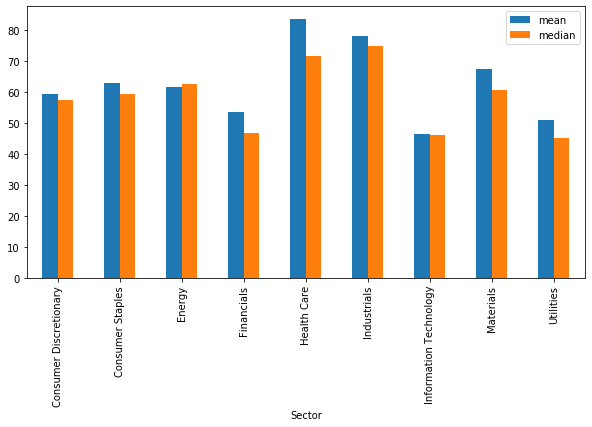

In [24]:
df = sp500_cut.groupby('Sector').Price.agg(['mean', 'median'])
df.plot(kind='bar', figsize=(10, 5))

In [25]:
df

,mean,median
Sector,,
Consumer Discretionary,59.299508,57.320
Consumer Staples,62.835313,59.325
Energy,61.662857,62.395
Financials,53.487321,46.635
Health Care,83.418966,71.640
Industrials,78.002264,74.720
Information Technology,46.380528,46.005
Materials,67.518333,60.705
Utilities,50.854483,45.230


вертикальная состыкованная столбчатая диаграмма

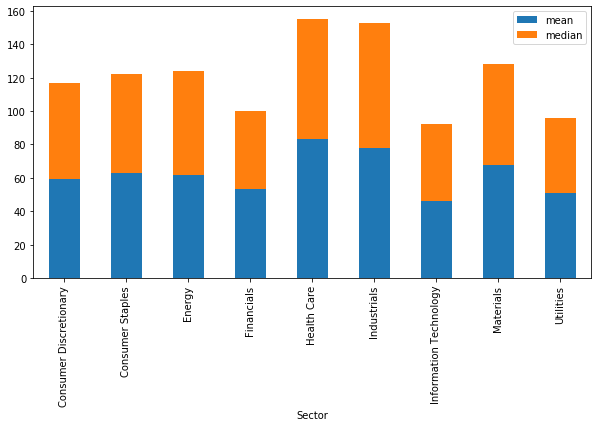

In [26]:
df.plot(kind='bar', stacked=True, figsize=(10, 5));

горизонтальная состыкованная столбиковая диаграмма

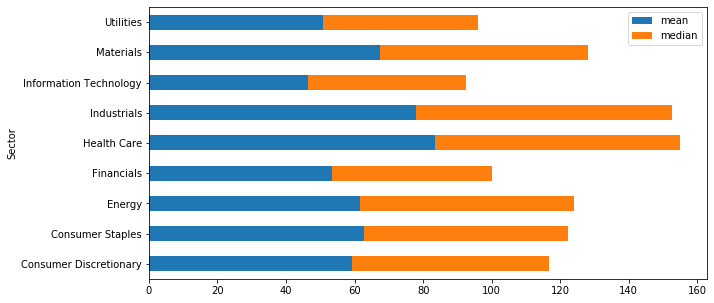

In [27]:
df.plot(kind='barh', stacked=True, figsize=(10, 5));

#### hist

строим гистограмму

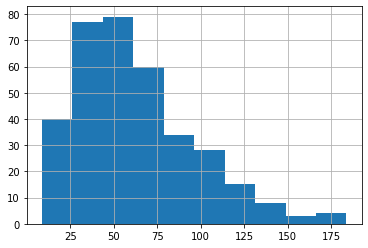

In [28]:
sp500_cut.Price.hist()

снова строим гистограмму, но теперь с большим количеством интервалов (бинов)

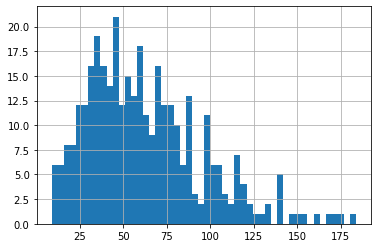

In [29]:
sp500_cut.Price.hist(bins = 50);

поскольку у нас 4 столбца, pandas строит четыре гистограммы

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a8b80b8>,
      dtype=object)

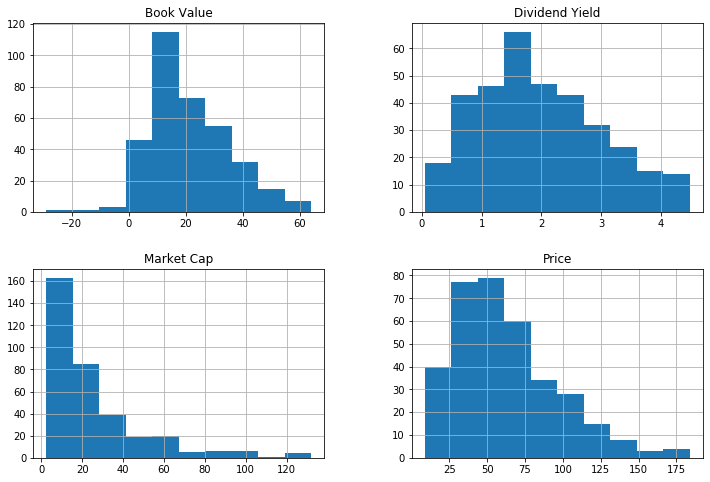

In [30]:
sp500_cut.hist(figsize=(12,8))

напрямую воспользуемся модулем pyplot  для наложения нескольких гистограмм

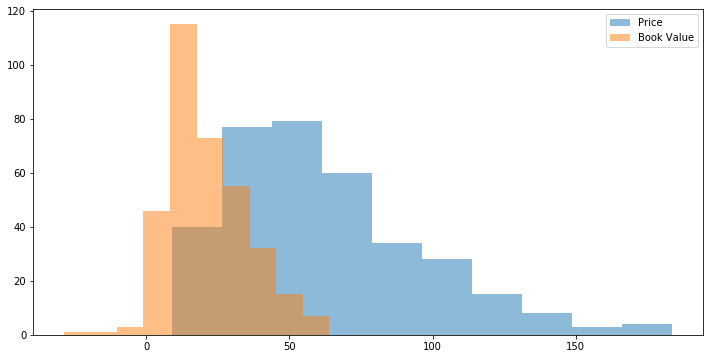

In [31]:
plt.figure(figsize=(12, 6))
plt.hist(sp500_cut.Price, alpha=0.5, label='Price')
plt.hist(sp500_cut['Book Value'], alpha=0.5, label='Book Value')
plt.legend(loc='upper right');

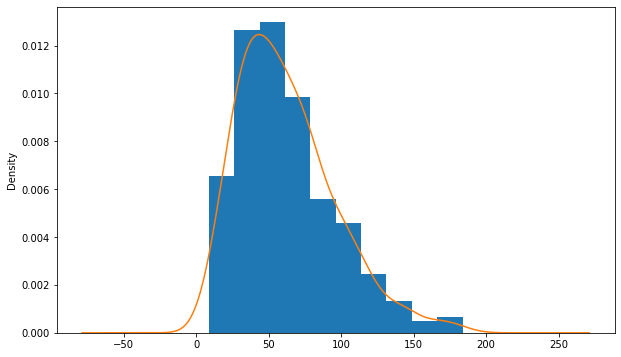

In [32]:
s = sp500_cut.Price
s.hist(density=True)
s.plot(kind='kde', figsize=(10,6))

#### box

<img src='..\images\boxplot.png'>

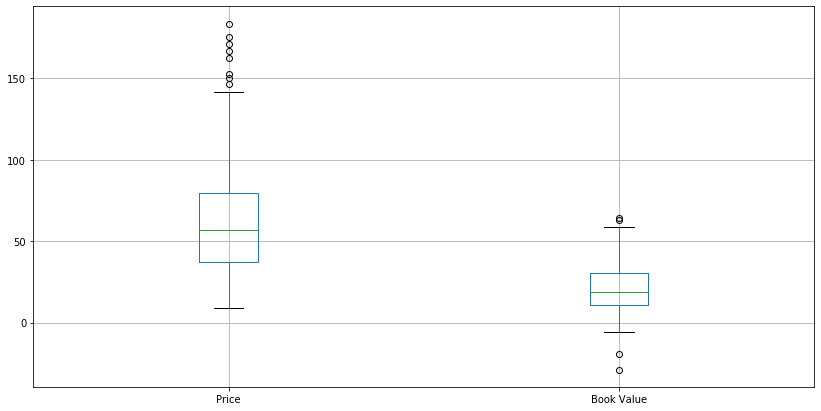

In [33]:
sp500_cut[['Price','Book Value']].boxplot(figsize = (14, 7))

#### scatter

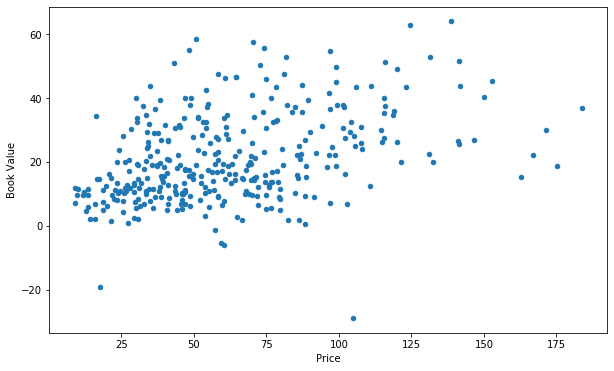

In [34]:
sp500_cut.plot(kind='scatter', x='Price', y='Book Value', figsize=(10, 6));

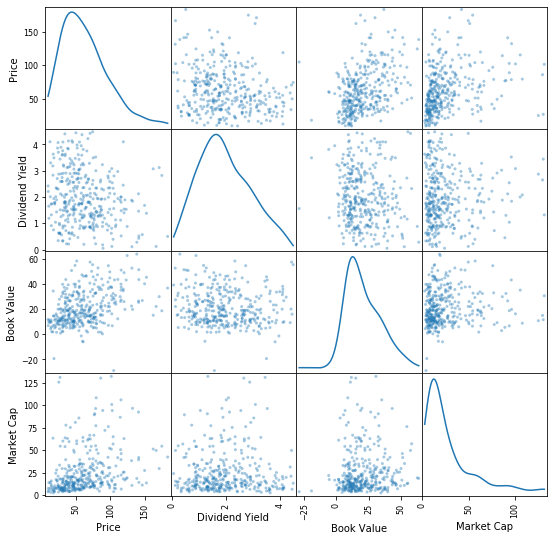

In [35]:
from pandas.plotting import scatter_matrix
scatter_matrix(sp500_cut, alpha=0.4, figsize=(9, 9), diagonal='kde');

#### heat map

In [36]:
corr_matrix = sp500_cut.corr()
corr_matrix

,Price,Dividend Yield,Book Value,Market Cap
Price,1.000000,-0.198063,0.400478,0.300704
Dividend Yield,-0.198063,1.000000,-0.094121,0.019838
Book Value,0.400478,-0.094121,1.000000,0.069702
Market Cap,0.300704,0.019838,0.069702,1.000000


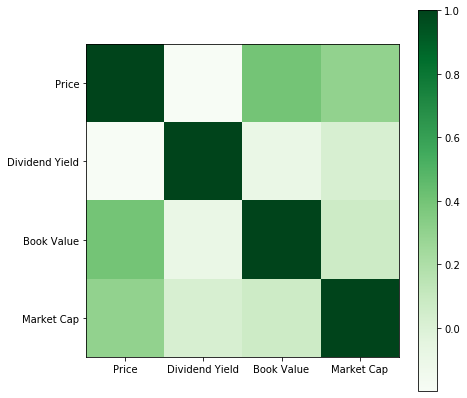

In [37]:
plt.figure(figsize=(7, 7))
plt.imshow(corr_matrix, cmap='Greens')
plt.colorbar()  # добавим шкалу интенсивности цвета

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.index);